In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:

y_train = y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
y_test = y_test.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
 plt.figure(figsize = (15,2))
 plt.imshow(X[index])
 plt.xlabel(classes[y[index]])


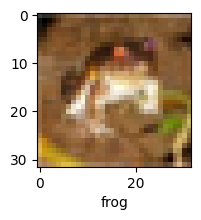

In [8]:
plot_sample(X_train, y_train, 0)


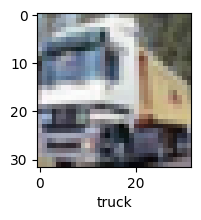

In [9]:
plot_sample(X_train, y_train, 1)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [11]:
ann = models.Sequential([
 layers.Flatten(input_shape=(32,32,3)),
 layers.Dense(3000, activation='relu'),
 layers.Dense(1000, activation='relu'),
 layers.Dense(10, activation='softmax')
 ])
ann.compile(optimizer='SGD',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 107s 68ms/step - loss: 1.8142 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6223 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5432 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4821 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.4331 - accuracy: 0.4966


In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 17ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.53      0.55      1000
           1       0.44      0.81      0.57      1000
           2       0.45      0.30      0.36      1000
           3       0.32      0.48      0.38      1000
           4       0.51      0.31      0.39      1000
           5       0.44      0.28      0.34      1000
           6       0.56      0.49      0.52      1000
           7       0.50      0.61      0.55      1000
           8       0.57      0.64      0.60      1000
           9       0.62      0.37      0.47      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [13]:
cnn = models.Sequential([
 layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (32,32,3)),
 layers.MaxPooling2D((2, 2)),

 layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),

 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])


In [14]:
 cnn.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 52s 32ms/step - loss: 1.4474 - accuracy: 0.4834
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0896 - accuracy: 0.6190
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9567 - accuracy: 0.6676
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8733 - accuracy: 0.6976
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8045 - accuracy: 0.7202
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7474 - accuracy: 0.7411
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6924 - accuracy: 0.7595
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6472 - accuracy: 0.7752
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6056 - accuracy: 0.7878
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [16]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 11ms/step - loss: 0.9204 - accuracy: 0.7019


[0.9203608632087708, 0.7019000053405762]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[1.08748834e-04, 1.30775616e-05, 2.79690605e-04, 8.22848260e-01,
        8.96726306e-06, 1.76116094e-01, 1.82241653e-04, 2.37074642e-06,
        4.10517183e-04, 3.01135660e-05],
       [4.11859155e-03, 6.46295488e-01, 6.22934238e-07, 1.23195559e-06,
        1.70047349e-06, 1.71809447e-08, 6.45242579e-08, 3.48601520e-06,
        3.32542300e-01, 1.70365516e-02],
       [5.47845215e-02, 2.79378816e-02, 1.91892236e-02, 1.69730396e-03,
        2.67250254e-03, 4.61040501e-04, 1.60849610e-04, 1.01971091e-03,
        8.89057875e-01, 3.01908003e-03],
       [2.96330959e-01, 6.29972061e-03, 1.91579980e-03, 2.61801598e-03,
        1.44786516e-03, 9.73564238e-06, 1.84927630e-04, 1.00326652e-04,
        6.91090703e-01, 1.97221220e-06],
       [1.26952307e-06, 2.03228694e-07, 4.36166854e-04, 5.30047156e-03,
        4.11133766e-01, 1.14906332e-04, 5.82985461e-01, 1.83185485e-08,
        2.77267518e-05, 1.11328227e-08]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 1, 8, 8, 6]

In [19]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

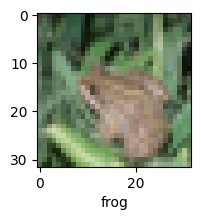

In [23]:
plot_sample(X_test, y_test,4)

In [24]:
classes[y_classes[4]]

'frog'

In [25]:
classes[y_classes[4]]


'frog'